<h1>Pippete Calibration Test</h1>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<h2>Prepare Data</h2>

In [5]:
t = {
    "p10": {"1µ": [0.0010, 0.0011, 0.0009], "5µ": [0.0049, 0.0047, 0.0047], "10µ": [0.0096, 0.0098, 0.0098]},
    "p200": {"20µ": [0.0193, 0.0195, 0.0193], "100µ": [0.0980, 0.0983, 0.0985], "200µ": [0.1977, 0.1976, 0.1978]},
    "p1000": {"100µ": [0.0979, 0.0989, 0.0979], "500µ": [0.4949, 0.4931, 0.4928], "1000µ": [0.9892, 0.9881, 0.9851]}
}

l = {
    "p20": {"2µ": [0.014, 0.0016, 0.0018], "10µ": [0.0088, 0.0099, 0.0094], "20µ": [0.0189, 0.201, 0.0194]},
    "p200": {"20µ": [0.0193, 0.0199, 0.0200], "100µ": [0.0989, 0.0996, 0.0999], "200µ": [0.2050, 0.2006, 0.2006]}
}

t_data = []
for pipette, volumes in t.items():
    for volume, measurements in volumes.items():
        for measurement in measurements:
            t_data.append([pipette, volume, measurement])



t_df = pd.DataFrame(t_data, columns=["Pipette", "Volume*", "Measurement"])
pattern = ["low-val"]*3 + ["med-val"]*3 + ["high-val"]*3
repeated_pattern = pattern * 3
t_df["Volume"] = repeated_pattern
t_df["Normalized Measurement"] = t_df.groupby("Pipette")["Measurement"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
t_df

,Pipette,Volume*,Measurement,Volume,Normalized Measurement
0,p10,1µ,0.0010,low-val,0.011236
1,p10,1µ,0.0011,low-val,0.022472
2,p10,1µ,0.0009,low-val,0.000000
3,p10,5µ,0.0049,med-val,0.449438
4,p10,5µ,0.0047,med-val,0.426966
5,p10,5µ,0.0047,med-val,0.426966
6,p10,10µ,0.0096,high-val,0.977528
7,p10,10µ,0.0098,high-val,1.000000
8,p10,10µ,0.0098,high-val,1.000000
9,p200,20µ,0.0193,low-val,0.000000


In [6]:
l_data = []
for pipette, volumes in l.items():
    for volume, measurements in volumes.items():
        for measurement in measurements:
            l_data.append([pipette, volume, measurement])



l_df = pd.DataFrame(l_data, columns=["Pipette", "Volume*", "Measurement"])
pattern = ["low-val"]*3 + ["med-val"]*3 + ["high-val"]*3
repeated_pattern = pattern * 2
l_df["Volume"] = repeated_pattern
l_df["Normalized Measurement"] = l_df.groupby("Pipette")["Measurement"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
l_df

,Pipette,Volume*,Measurement,Volume,Normalized Measurement
0,p20,2µ,0.0140,low-val,0.062187
1,p20,2µ,0.0016,low-val,0.000000
2,p20,2µ,0.0018,low-val,0.001003
3,p20,10µ,0.0088,med-val,0.036108
4,p20,10µ,0.0099,med-val,0.041625
5,p20,10µ,0.0094,med-val,0.039117
6,p20,20µ,0.0189,high-val,0.086760
7,p20,20µ,0.2010,high-val,1.000000
8,p20,20µ,0.0194,high-val,0.089268
9,p200,20µ,0.0193,low-val,0.000000


<h2>Visualize the Data</h2>

<Figure size 2600x800 with 0 Axes>

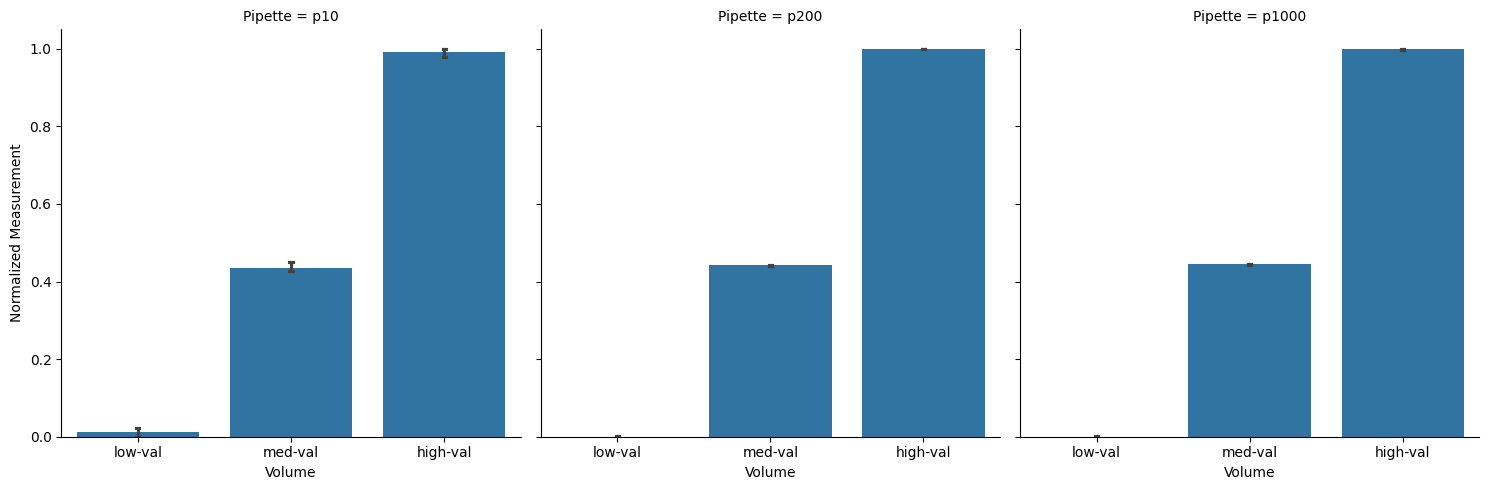

In [7]:
plt.figure(figsize=(26, 8))
sns.catplot(kind='bar', data=t_df, x='Volume', y='Normalized Measurement', col='Pipette', capsize=0.02)
plt.show()

<Figure size 1800x800 with 0 Axes>

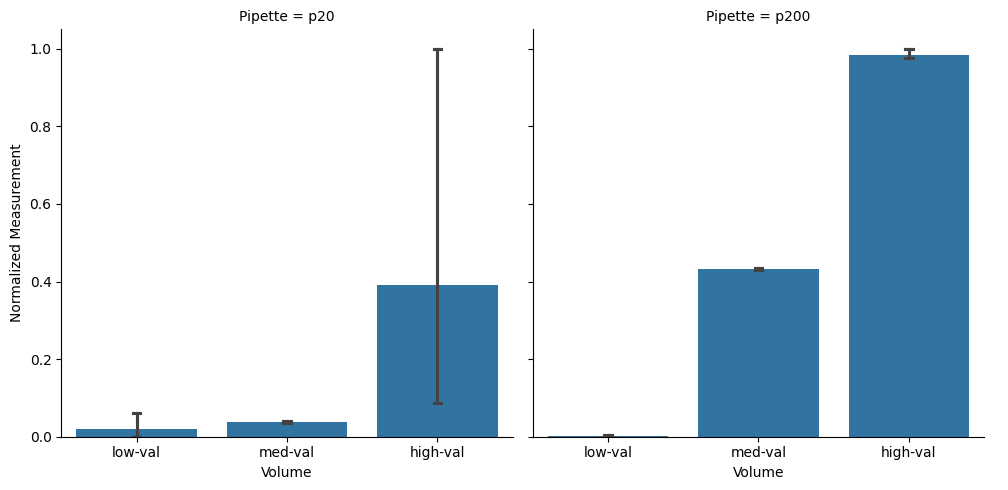

In [8]:
plt.figure(figsize=(18, 8))
sns.catplot(kind='bar', data=l_df, x='Volume', y='Normalized Measurement', col='Pipette', capsize=.05)
plt.show()

<h2>Store the Data</h2>

In [10]:
t_df.to_csv('t_df.csv', index=False)
l_df.to_csv('l_df.csv', index=False)

<h2>handling errors and outliers</h2>

In [11]:
t_outliers = {}
for pipette, volumes in t.items():
    t_outliers[pipette] = {}
    for volume, measurements in volumes.items():

        Q1 = np.percentile(measurements, 25)
        Q3 = np.percentile(measurements, 75)

        IQR = Q3 - Q1

        lower_threshold = Q1 - 1.5 * IQR
        upper_threshold = Q3 + 1.5 * IQR

        outlier_indices = np.where((measurements < lower_threshold) | (measurements > upper_threshold))[0]

        t_outliers[pipette][volume] = [measurements[i] for i in outlier_indices]

t_mad_deviations = {}

for pipette, volumes in t.items():
    t_mad_deviations[pipette] = {}
    for volume, measurements in volumes.items():
        mad_dev = np.mean(np.abs(np.array(measurements) - np.mean(measurements)))
        t_mad_deviations[pipette][volume] = mad_dev




l_outliers = {}

for pipette, volumes in l.items():
    l_outliers[pipette] = {}
    for volume, measurements in volumes.items():

        Q1 = np.percentile(measurements, 25)
        Q3 = np.percentile(measurements, 75)

        IQR = Q3 - Q1

        lower_threshold = Q1 - 1.5 * IQR
        upper_threshold = Q3 + 1.5 * IQR

        outlier_indices = np.where((measurements < lower_threshold) | (measurements > upper_threshold))[0]

        l_outliers[pipette][volume] = [measurements[i] for i in outlier_indices]

l_mad_deviations = {}

for pipette, volumes in l.items():
    l_mad_deviations[pipette] = {}
    for volume, measurements in volumes.items():

        mad_dev = np.mean(np.abs(np.array(measurements) - np.mean(measurements)))
        l_mad_deviations[pipette][volume] = mad_dev

In [12]:
print("t Outliers:")
print(t_outliers)
print("t Mean Absolute Deviations (MAD):")
print(t_mad_deviations)

print("l Outliers:")
print(l_outliers)
print("l Mean Absolute Deviations (MAD):")
print(l_mad_deviations)

t Outliers:
{'p10': {'1µ': [], '5µ': [], '10µ': []}, 'p200': {'20µ': [], '100µ': [], '200µ': []}, 'p1000': {'100µ': [], '500µ': [], '1000µ': []}}
t Mean Absolute Deviations (MAD):
{'p10': {'1µ': 6.66666666666667e-05, '5µ': 8.888888888888864e-05, '10µ': 8.888888888888893e-05}, 'p200': {'20µ': 8.888888888888835e-05, '100µ': 0.0001777777777777767, '200µ': 6.666666666666858e-05}, 'p1000': {'100µ': 0.00044444444444444636, '500µ': 0.0008666666666666637, '1000µ': 0.001577777777777752}}
l Outliers:
{'p20': {'2µ': [], '10µ': [], '20µ': []}, 'p200': {'20µ': [], '100µ': [], '200µ': []}}
l Mean Absolute Deviations (MAD):
{'p20': {'2µ': 0.005466666666666666, '10µ': 0.0003777777777777778, '20µ': 0.08082222222222223}, 'p200': {'20µ': 0.0002888888888888883, '100µ': 0.0003777777777777778, '200µ': 0.0019555555555555437}}
